In [226]:
#Montaje de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
#librerias
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from PIL import Image
import torch
import torch.utils.data
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import models #just for debugging
from torchvision import transforms
from torchsummary import summary #just for debugging

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Just run once, and set the selected dir
os.mkdir('/content/drive/MyDrive/PROYECTO FINAL DL/classes')

In [ ]:
#Just run once, and set the selected dir
!unzip "/content/drive/MyDrive/PROYECTO FINAL DL/classes.zip" -d "/content/drive/MyDrive/PROYECTO FINAL DL/classes"

In [228]:
#getting metadata from the CSV file (main purpose is get labels and its indexes)
data_skin = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL DL/DATASET_UNZIPPED/HAM10000_metadata.csv')

In [229]:
#CREATING THE DATASET CLASS LOADER
################# UNUSED, this is for taking the dataset manually
class Skin_Cancer_Loader(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations=pd.read_csv(csv_file)
    self.root_dir=root_dir
    self.transform=transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self,index):
    img_path=os.path.join(self.root_dir, self.annotations.iloc[index, 0])
    image=io.imread(img_path)
    y_label=torch.tensor(int(self.annotations.iloc[index, 1]))

    if self.transform:
      image=self.transform(image)
    
    return(image,y_label)

In [ ]:
#We left aside other labels but these:
# nv - (melanocytic nevy)
# mel - (melanoma)
# bkl - (benign keratosis)
# labeled as 5, 4 & 2  

shutil.rmtree('/content/drive/MyDrive/PROYECTO FINAL DL/classes/classes/bcc')
shutil.rmtree('/content/drive/MyDrive/PROYECTO FINAL DL/classes/classes/akiec')
shutil.rmtree('/content/drive/MyDrive/PROYECTO FINAL DL/classes/classes/df')
shutil.rmtree('/content/drive/MyDrive/PROYECTO FINAL DL/classes/classes/vasc')

In [230]:
#Loading dataset with imagefolder technique
train_dir='/content/drive/MyDrive/PROYECTO FINAL DL/classes/classes' #getting image directory

TRANSFORM_IMG=transforms.Compose([
	transforms.Resize(size=(64,64)), #sizing all images to 64x64
	transforms.RandomHorizontalFlip(), #make a horizontal flip at some images
	transforms.ToTensor()]) #make them all tensors
	#transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])  #normalization is applied before entering data to model

#making a dataset object for the imagefolder
skin_dataset = torchvision.datasets.ImageFolder(root=train_dir,transform=TRANSFORM_IMG) 

#splitting dataset into train and test
train = int(len(skin_dataset) * 0.8)
test = len(skin_dataset) - train

train_dataset, test_dataset = torch.utils.data.random_split(skin_dataset, [train, test])

train_dataLoader = DataLoader(train_dataset, shuffle=True, sampler=None, batch_size=16) #Getting data for training
test_dataLoader = DataLoader(test_dataset, shuffle=True, sampler=None, batch_size=16) #Getting data for testing


labels=np.array(skin_dataset.targets)
(unique,counts)=np.unique(labels,return_counts=True)
frecuencies_of_labels=np.asarray((unique, counts))

print(frecuencies_of_labels) #visualizing the amount of labels with its amount of images data
print(len(train_dataset))
print(len(test_dataset))

[[   0    1    2]
 [1099 1113 6705]]
7133
1784


In [231]:
classes=train_dataLoader.dataset.dataset.classes
print(classes)
#dir(train_dataLoader.dataset.dataset.classes)

['bkl', 'mel', 'nv']


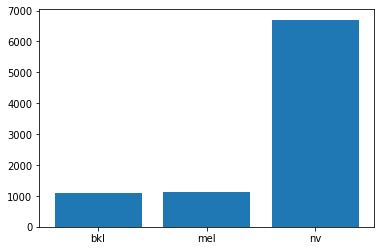

In [232]:
#frecuencies of datas against its labels
plt.bar(frecuencies_of_labels[0,:], frecuencies_of_labels[1,:])
plt.xticks(frecuencies_of_labels[0,:],classes);

In [233]:
data_skin['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


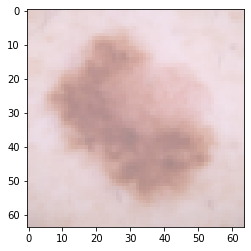

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


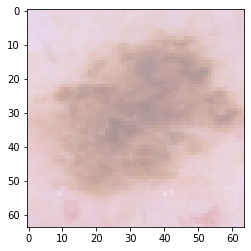

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


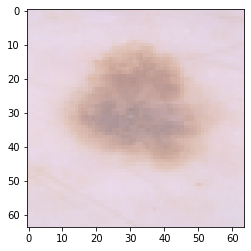

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


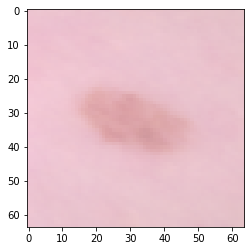

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


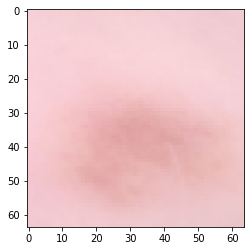

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


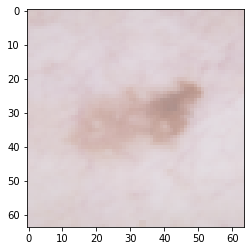

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


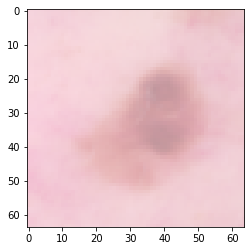

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


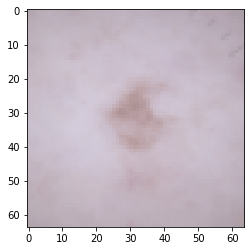

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


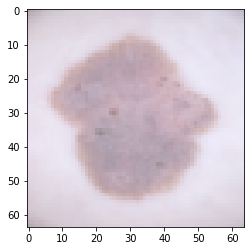

Label: bkl
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


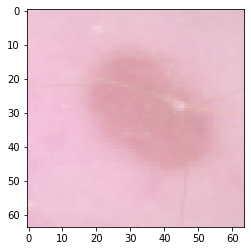

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


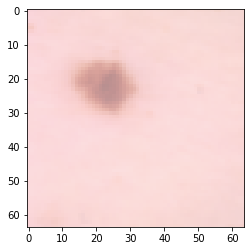

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


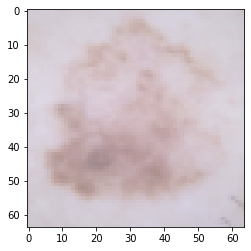

Label: mel
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


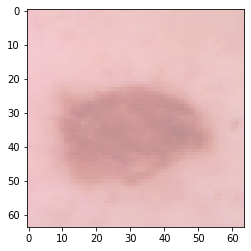

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


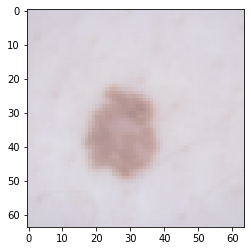

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


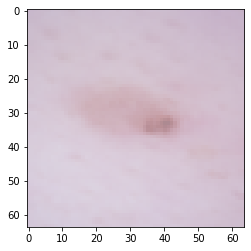

Label: nv
Feature batch shape: torch.Size([64, 64, 3, 16])
Labels batch shape: torch.Size([16])
torch.Size([3, 64, 64])


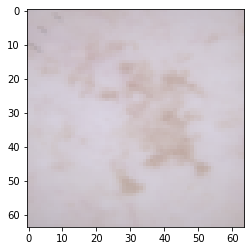

Label: bkl


In [234]:
labels_map = {
    0: "bkl",
    1: "mel",
    2: "nv",
}

# Display image and label.
train_features, train_labels = next(iter(test_dataLoader))
for i in range(16):
  print(f"Feature batch shape: {train_features.T.size()}")
  print(f"Labels batch shape: {train_labels.size()}")
  img = train_features[i].squeeze()
  label = train_labels[i]
  print(img.shape)
  plt.imshow(img.T / 2 + 0.5)
  plt.show()
  print(f"Label: {labels_map[torch.IntTensor.item(label)]}")



In [235]:
print(train_features.shape)

torch.Size([16, 3, 64, 64])


torch.Size([16, 3, 64, 64])


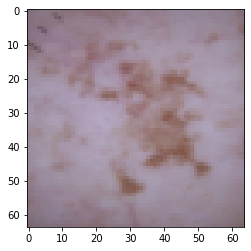

torch.Size([16, 256, 62, 62])
torch.Size([16, 256, 31, 31])
torch.Size([16, 128, 29, 29])
torch.Size([16, 128, 14, 14])
torch.Size([16, 64, 12, 12])
torch.Size([16, 64, 6, 6])


In [236]:
#figuring out the number of neurons of the first fully conected layer
#This is a pre-model
conv1=torch.nn.Conv2d(in_channels = 3, out_channels = 256, kernel_size = 3)

conv2=torch.nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size = 3)

conv3=torch.nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3)

pool=nn.MaxPool2d(kernel_size=2, stride=2)



print(train_features.shape)
#visualizating an image
plt.imshow(train_features[15,:,:,:].T)
plt.show()


x=conv1(train_features)
print(x.shape)

x=pool(x)
print(x.shape)

x=conv2(x)
print(x.shape)

x=pool(x)
print(x.shape)

x=conv3(x)
print(x.shape)

x=pool(x)
print(x.shape)




#we can see that the correct number of neurons as the output channels x height x width

In [237]:
#Model
class Skin_Cancer_Model(torch.nn.Module):
	def __init__(self):
		super(Skin_Cancer_Model, self).__init__()
		self.model = torch.nn.Sequential(
			torch.nn.Conv2d(in_channels = 3, out_channels = 256, kernel_size = 3),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(2,2),
      torch.nn.Dropout(0.3),
			torch.nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size = 3),
			torch.nn.ReLU(),
      torch.nn.Dropout(0.3),
      torch.nn.MaxPool2d(2,2),
			torch.nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = 3),
      torch.nn.Dropout(0.3),
			torch.nn.ReLU(),
			torch.nn.MaxPool2d(2,2),

			torch.nn.Flatten(),
			torch.nn.Linear(64*6*6,32),
      torch.nn.Softmax(dim=-1),
      torch.nn.Linear(32, 3)
		)

	def forward(self, x):
		return self.model(x)

model=Skin_Cancer_Model().to(device)
model.to(device)

Skin_Cancer_Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): Dropout(p=0.3, inplace=False)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=2304, out_features=32, bias=True)
    (14): Softmax(dim=-1)
    (15): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [239]:
#creating hyper parameters
learning_rate = 0.01
num_epochs = 100

error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Traning the Model
from torch.autograd import Variable
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    print('Epoch {}/{}:'.format(epoch+1, num_epochs))
    model.train()
    for i, (images, labels) in enumerate(train_dataLoader):

        train = Variable(images/255).to(device)
        labels = Variable(labels).to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train).to(device)
        #print(outputs)
        #print(labels)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        

    # Calculate Accuracy         
    correct = 0
    total = 0
    # Predict test dataset
    model.eval()
    with torch.no_grad():
      for images, labels in test_dataLoader:
        test = Variable(images).to(device)
        outputs = model(test).to(device)
                      
        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # Total number of labels
        total += len(labels)
        # Total correct predictions
        correct += (predicted == labels).sum()

      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(correct / float(total))
      # Print Loss
    print('Loss: {}  Val_Accuracy: {} '.format(loss.data, correct / float(total)))

Epoch 1/100:
Loss: 0.4408247172832489  Val_Accuracy: 0.7668161392211914 
Epoch 2/100:
Loss: 0.5790010690689087  Val_Accuracy: 0.7668161392211914 
Epoch 3/100:
Loss: 0.6990492343902588  Val_Accuracy: 0.7668161392211914 
Epoch 4/100:
Loss: 0.6950649619102478  Val_Accuracy: 0.7668161392211914 
Epoch 5/100:
Loss: 0.697524905204773  Val_Accuracy: 0.7668161392211914 
Epoch 6/100:
Loss: 0.5722927451133728  Val_Accuracy: 0.7668161392211914 
Epoch 7/100:


In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()